# Prosper Loan Data

#### by Franck Alain Binde Koube

## Dataset Overview

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. All the descriptions about the columns could be find <a href="https://docs.google.com/spreadsheets/u/0/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit?usp=sharing">here</a>. It is strongly recommended to have a look at the variables description to better understand the data.

<img src="https://images.unsplash.com/photo-1579621970795-87facc2f976d?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1170&q=80" width=300/>

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_theme()

%matplotlib inline

<b>Loading the dataset</b>

In [2]:
df = pd.read_csv('prosperLoanData.csv')

In [3]:
# inspecting the first rows
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
# Dimension of the dataset
df.shape

(113937, 81)

In [5]:
# Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### Structure of the dataset

There are 113937 entries in this dataset for 81 columns. The dataset is diverse, with numeric and non numeric columns.

### Main feature(s) of interest

I am more interested in understanding the factors that may affect the loan status, the loan original amount and the borrower rate.

### Features in the dataset I think will help support my investigation

For my investigation, I'll definitely use the `LoanStatus`, `LoanOriginalAmount` and `BorrowerRate` columns. For this, I won't use all the 81 columns. I am more interested in understanding how the following variables might impact my features of interest:

- `ListingCategory (numeric)`
- `EmploymentStatus`
- `Term`
- `IsBorrowerHomeowner`
- `IncomeRange`
- `StatedMonthlyIncome`
- `LoanOriginalAmount`
- `LoanOriginalDate`
- `TotalCreditLinesPast7Years`
- `ProsperScore`

Let's select the columns of interest.

In [6]:
cols = ['ListingNumber', 'Term', 'LoanStatus', 'BorrowerRate', 'ListingCategory (numeric)', 'EmploymentStatus',\
        'IsBorrowerHomeowner', 'IncomeRange', 'TotalCreditLinespast7years', 'LoanOriginationDate', \
        'LoanOriginalAmount', 'ProsperScore']

df = df[cols]

We want to investigate past loans, not current ones. Therefore, we will exclude current loans.

In [7]:
# Excluding current loans
df = df[df.LoanStatus != "Current"]

## Univariate Exploration

We will start by exploring the variable `LoanStatus`.

We will create functions that will help us avoid repetition. 

In [8]:
base_color = sb.color_palette()[0]

# function to visualize horizontal barplots
def plot_bar(df, col):
    series_order = df[col].value_counts().index # finding the order of the serie
    sb.countplot(data = df, y = col, color = base_color, order = series_order);

In [9]:
# function to set the figure size
def fg(width, height):
    return plt.figure(figsize=(width, height))

In [10]:
# function to describe the plots with appropriate axes labels and titles
def describe_graph(x_label="", y_label="", title=""):
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title, fontsize=14)

### How often is each loan status present in the dataset?

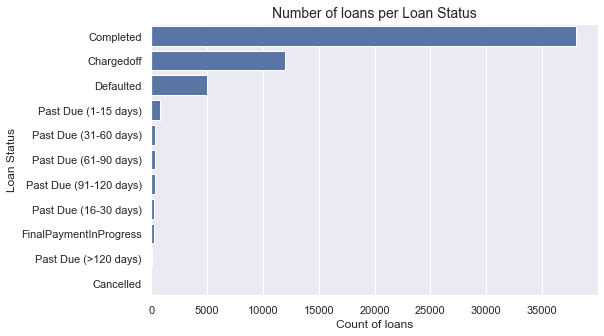

In [11]:
# plotting LoanStatus
fg(8, 5)
plot_bar(df, 'LoanStatus')
describe_graph(title = "Number of loans per Loan Status", x_label = "Count of loans", y_label = "Loan Status")

In our dataset, we can mainly observe 3 loan status:
- Completed
- ChargedOff
- Defaulted

The other status are in a very limited amount. Hence, we will remove rows with loan status different than the mainly ones, in order to reduce noise.

In [12]:
# creating list containing the main loan status
loan_status = ['Completed', 'Chargedoff', 'Defaulted']
df = df.query('LoanStatus in @loan_status')

### How is the distribution of the Loan Original Amount?

We will use a histogram to see this distribution

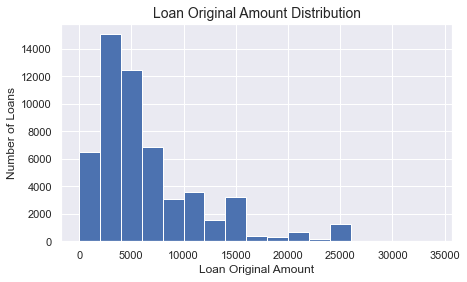

In [13]:
# using numpy to specify the bins
fg(7, 4)
bins = np.arange(0, df.LoanOriginalAmount.max() + 1000, 2000)
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bins)
describe_graph(x_label = "Loan Original Amount", y_label = "Number of Loans", title = "Loan Original Amount Distribution")

The number of loan amounts higher than 26K is so low that we barely see it on the histogram. Let's zoom in by setting limits for the x-axis.

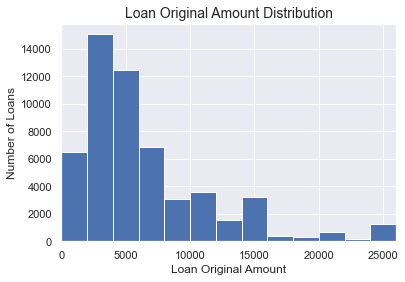

In [14]:
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bins)
#setting limits for the x-axis
plt.xlim(0, 26000)
describe_graph(x_label = "Loan Original Amount", y_label = "Number of Loans", title = "Loan Original Amount Distribution")

The distribution is <b>right-skewed</b>. The majority of the loans are between \\$2000 and $4000. The higher the loan amount, the lesser the count number.

### What are important statistics about Borrower Rate?

This time we will use a boxplot, in order to visualize summary statistics.

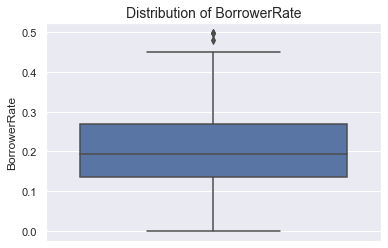

In [15]:
# using seaborn to generate the boxplot
sb.boxplot(data = df, y = 'BorrowerRate')
describe_graph(title = "Distribution of BorrowerRate", y_label = "BorrowerRate");

50% of the data have a borrower rate of over 20% (slightly). We have a few outliers, representing a borrower rate close to 50%.

### How often is each employment status present?

A barplot will help us to answer this question.

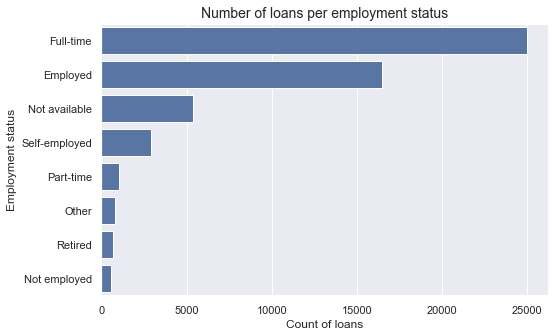

In [16]:
# generating the barplot
fg(8, 5)
plot_bar(df, 'EmploymentStatus')
describe_graph(title="Number of loans per employment status", x_label = "Count of loans", y_label = "Employment status")

The majority of the borrowers are <b>employed</b> and work <b>full-time</b>. Many didn't specify their employment status (not available).

### Does the number of loans vary based on the income range?
First, let's see the different income ranges

In [17]:
df.IncomeRange.value_counts()

$25,000-49,999    16343
$50,000-74,999    12789
Not displayed      7737
$75,000-99,999     6442
$100,000+          6064
$1-24,999          4571
$0                  606
Not employed        532
Name: IncomeRange, dtype: int64

Since there is a natural hierarchy the values can take, we will convert the `IncomeRange` variable to a categorical one. Besides, the two incomes ranges "Not employed" and "\\$0" are ambiguous. Indeed, someone can specify an income range of $0 because he is not employed. Also, the amount of loans with these income ranges are very low. We could also remove them to minimize noise.

In [18]:
ranges = ['Not employed', '$0']
df = df.query("IncomeRange not in @ranges")
# checking if the filtering worked
df.IncomeRange.value_counts()

$25,000-49,999    16343
$50,000-74,999    12789
Not displayed      7737
$75,000-99,999     6442
$100,000+          6064
$1-24,999          4571
Name: IncomeRange, dtype: int64

In [19]:
df.Term.unique()

array([36, 60, 12], dtype=int64)

In [20]:
# ordering income_classes
income_classes = ['Not displayed', '$1-24,999', '$25,000-49,999', '$50,000-74,999',\
                  '$75,000-99,999', '$100,000+']


# creating the categories
i_classes = pd.api.types.CategoricalDtype(ordered=True, categories=income_classes)

# converting the column to a categorical one
df['IncomeRange'] = df['IncomeRange'].astype(i_classes);

In [21]:
# convert cut, color, and clarity into ordered categorical types
ordinal_var_dict = {'IncomeRange': ['Not displayed', '$1-24,999', '$25,000-49,999', '$50,000-74,999','$75,000-99,999',\
                               '$100,000+'],
                    'Term': [12, 36, 60]
                    }

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

In [22]:
# checking our conversion worked
df.IncomeRange.dtype

CategoricalDtype(categories=['Not displayed', '$1-24,999', '$25,000-49,999',
                  '$50,000-74,999', '$75,000-99,999', '$100,000+'],
, ordered=True)

Now we can use a barchart to answer our question.

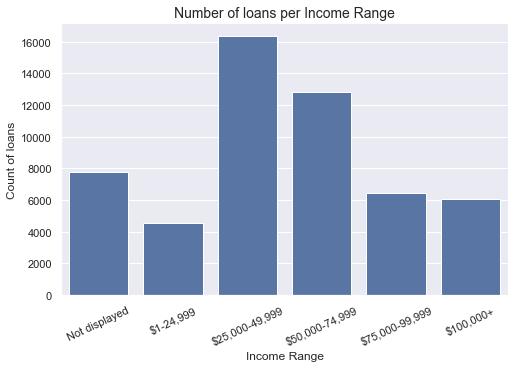

In [23]:
fg(8, 5)
sb.countplot(data = df, x = 'IncomeRange', color = base_color)
describe_graph(title="Number of loans per Income Range", x_label = "Income Range", y_label = "Count of loans")
plt.xticks(rotation=25);

People with incomes between <b>\\$25000</b> and <b>\\$49999</b> are mainly present. 

### What is the distribution of the Prosper Score?

Values of ProsperScore are numeric and discrete. Because of that, a barplot seems more appropriate.

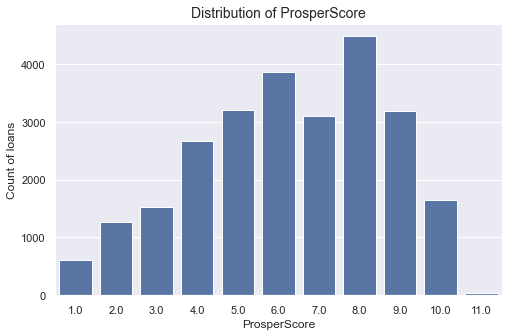

In [24]:
fg(8, 5)
bins = np.arange(1, 11, 1)
sb.countplot(data = df, x = 'ProsperScore', color = base_color)
describe_graph(x_label = "ProsperScore", y_label = "Count of loans", title = "Distribution of ProsperScore");

The distribution is slightly <b>left-skewed</b>, with the majority of loans with a Prosper Score of 8.

### What are the dominant Listing Categories?

The variable `ListingCategory (numeric)` contains numeric values. To ease our understanding, we will match these values with the full name of the category. First we will convert the numeric columns to string (object) type. Then, we will use a dictionnary to do the matching operation.

In [25]:
# Converting ListingCategory to string (object) type
df['ListingCategory (numeric)'] = df['ListingCategory (numeric)'].astype(str)

In [26]:
# Building a dictionnary to match Listing Category with Actual Full Name Category
listings_cat = {
    '0': 'Not Available', '1': 'Debt Consolidation', '2': 'Home Improvement', '3': 'Business', '4': 'Personal Loan'\
        , '5': 'Student Use', '6': 'Auto', '7': 'Other', '8': 'Baby&Adoption', '9': 'Boat', '10': 'Cosmetic Procedure'\
        , '11': 'Engagement Ring', '12': 'Green Loans', '13': 'Household Expenses', '14': 'Large Purchases',\
        '15': 'Medical/Dental', '16': 'Motorcycle', '17': 'RV', '18': 'Taxes', '19': 'Vacation', '20': 'Wedding Loans'  
} 

# Function to match Category number with Full name Category
def match_cat(key):
    return listings_cat[key]

In [27]:
# creating a new column ListingCategory containing the full name of the categories
df['ListingCategory'] = df['ListingCategory (numeric)'].apply(match_cat)

In [28]:
df.head()

,ListingNumber,Term,LoanStatus,BorrowerRate,ListingCategory (numeric),EmploymentStatus,IsBorrowerHomeowner,IncomeRange,TotalCreditLinespast7years,LoanOriginationDate,LoanOriginalAmount,ProsperScore,ListingCategory
0,193129,36,Completed,0.1580,0,Self-employed,True,"$25,000-49,999",12.0,2007-09-12 00:00:00,9425,NaN,Not Available
2,81716,36,Completed,0.2750,0,Not available,False,Not displayed,3.0,2007-01-17 00:00:00,3001,NaN,Not Available
11,213551,36,Completed,0.1325,0,Full-time,False,"$1-24,999",10.0,2007-10-18 00:00:00,1000,NaN,Not Available
15,577164,36,Defaulted,0.3177,13,Other,True,"$50,000-74,999",18.0,2012-04-19 00:00:00,4000,5.0,Household Expenses
17,31540,36,Chargedoff,0.1250,0,Not available,True,Not displayed,36.0,2006-08-22 00:00:00,10000,NaN,Not Available


We can now remove the numeric Listing Category column.

In [29]:
# dropping the previous ListingCategory (numeric) column
df.drop("ListingCategory (numeric)", axis = 1, inplace = True)

We are plotting a numeric variable against a categorical one. Therefore, we can use a barchart like before.

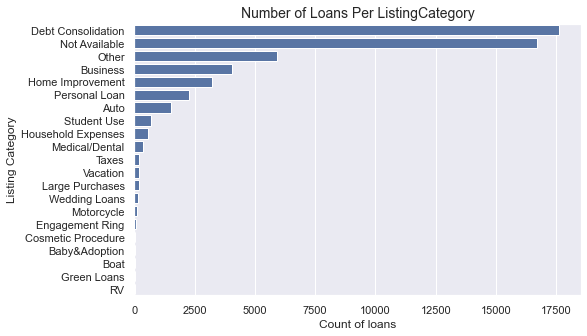

In [30]:
# Generating the barplot
fg(8, 5)
plot_bar(df, 'ListingCategory')
describe_graph(title = "Number of Loans Per ListingCategory", x_label = "Count of loans", y_label = "Listing Category")

The majority of loans are in the <b>Debt Consolidation</b> category. Also, it looks like many borrower don't feel comfortable displaying the reasons behind a loan. "Not Available" and "Other" are respectively the second and third category with the highest number of loans. "Business" and "Home Improvement" come next. 

### Which term period is most represented?

The `Term` column is categorical and ordinal. Hence, we will use a barplot and display the categories in their logical order on the x-axis.

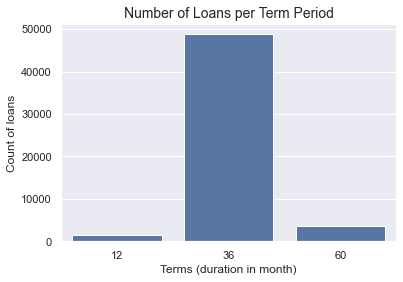

In [31]:
# Generating the barplot
sb.countplot(data = df, x = 'Term', color = base_color)
describe_graph(x_label = "Terms (duration in month)", y_label = "Count of loans", title = "Number of Loans per Term Period");

Loans with 36 months of Term period are by far the most represented. Let's quickly see what percentage it represents.

In [32]:
# group data by Term and count the number of items in each group
term_group = df.groupby('Term').count().LoanStatus

# get the number of loans for Term 36
loans_36 = term_group[36]
# calculate the percentage of loans with 36 months of Term period
loans_36_percent = round((loans_36 / df.shape[0]) * 100, 0)
print("Percentage of loans with 36 months of Term Period:")
print(loans_36_percent)

Percentage of loans with 36 months of Term Period:
90.0


Around <b>90%</b> of the loans have 36 months as Term Period.

### How distributed is the total credit lines received during the past 7 years?

Our variable of interest `TotalCreditLinespast7years` is numeric. Having an overview of summary statistics could be helpful. We can go with a <b>violin plot</b> to display that.

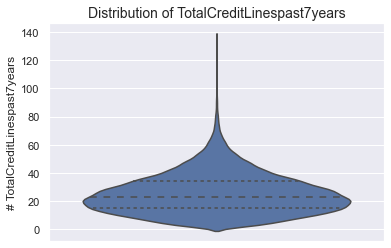

In [33]:
# generating the violin plot
sb.violinplot(data = df, y = 'TotalCreditLinespast7years', inner = 'quartile')
describe_graph(title = "Distribution of TotalCreditLinespast7years", y_label = "# TotalCreditLinespast7years");

The plot clearly shows that the distribution is <b>right-skewed</b>. 50% of loans are from borrowers wih less than 20 total credit line for the past 7 years.

### Are more loans issued during particular months?

We know the date a loan was generated. We will convert the `LoanOriginationDate` to a datetime column. We will then extract the month to perform our analysis.

In [34]:
# converting to datetime 
df.LoanOriginationDate = pd.to_datetime(df.LoanOriginationDate)

In [35]:
# creating a new column containing the month a loan was originated
df['monthLoanOrigination'] = df['LoanOriginationDate'].dt.month

In [36]:
# grouping by month, and counting the number of loans for each month
month_loan = df.groupby('monthLoanOrigination').count().Term

When dealing with months, we directly think of chronology. Because of that, a <b>linechart</b> is the best choice for our task.

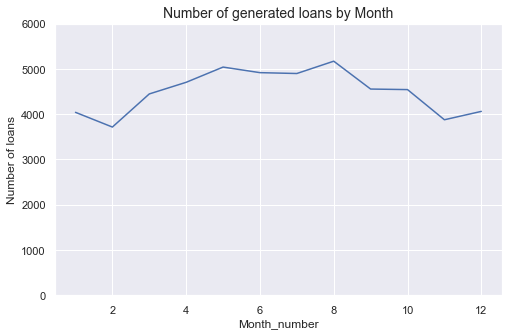

In [37]:
# generating the line plot
fg(8, 5)
plt.plot(month_loan.index, month_loan)
# setting ylim to better see the values
plt.ylim(0, 6000)
describe_graph(x_label = "Month_number", y_label = "Number of loans", title = "Number of generated loans by Month");

<b>August</b> is the month with most of the originated loans (around 5200 loans). With around 3800 loans generated, <b>February</b> ranks last in this category.

## Bivariate Exploration

> We will go a little further with our exploration. The univariate exploration generated even more questions that might need investigation.

### Is there a correlation between our numeric variables?

In the previous steps, we individually looked at our numeric variables. However, it could be important to see if two of them move in the same direction or not. Since we are talking about correlations between numeric variables, we could use a <b>heatmap</b>.

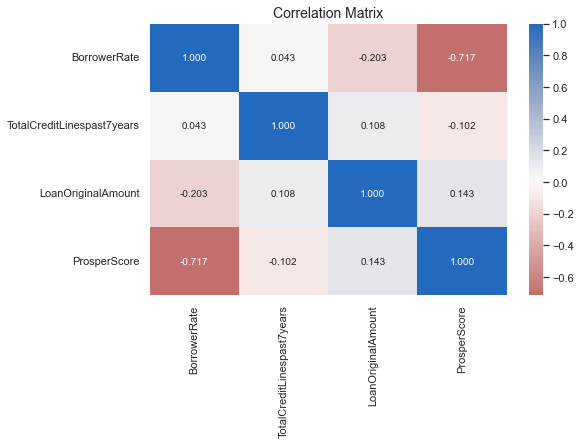

In [38]:
# specifying our numeric columns
numeric_vars = ['BorrowerRate', 'TotalCreditLinespast7years', 'LoanOriginalAmount', 'ProsperScore']
# generating the heatmap
fg(8, 5)
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
describe_graph(title = "Correlation Matrix")
plt.show()

The only correlation that needs our attention is the one between `ProsperScore` and `BorrowerRate`. There is a relatively strong and negative correlation (r = -0.717) between these two variables. That means, when the ProsperScore increases, the Borrower Rate tend to decrease. This is understandable. A higher prosper score means a loan with less risk. The lower the interest rate (low `BorrowerRate`), the lower the risk (high `ProsperScore`) to pay back. 

### Hos does the borrower rate impact the loan status?

Our variable of interests are categorical and numeric. A boxplot seems appropriate to investigate.

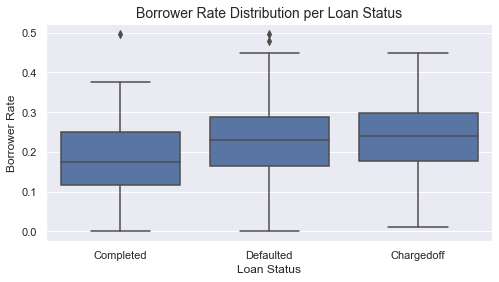

In [39]:
# Generating the boxplot
plt.figure(figsize = (8, 4))
sb.boxplot(data=df, x='LoanStatus', y='BorrowerRate', color = base_color)
describe_graph(title = "Borrower Rate Distribution per Loan Status", x_label = "Loan Status", y_label = "Borrower Rate");

The 1st, 2rd, 3rd quartile, and the maximum value for the borrower rate of <b>Completed</b> loans are all <b>lower</b> that the ones of defaulted and chargedoff loans. In general, people with lower interest rate for their loan tend to complete the payment. 

### Does employment status play a role in the loan original amount?

We suspect employed people to have higher loan amounts. That would be logical. But let's see if the data tells the same story.

The variable types are the same as in the previous case. So we will use boxplots.

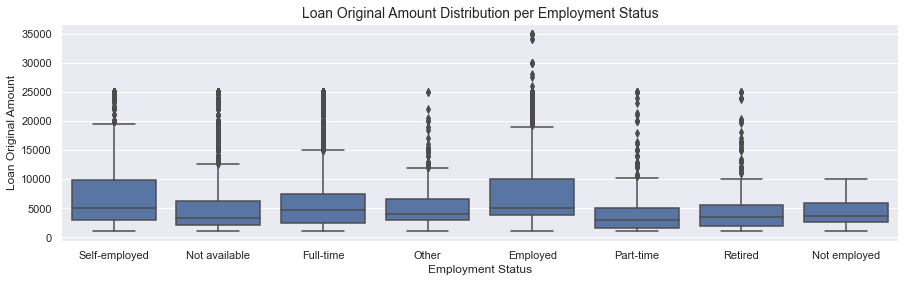

In [40]:
# Generating the boxplots
fg(15, 4)
sb.boxplot(data=df, x='EmploymentStatus', y='LoanOriginalAmount', color = base_color)
describe_graph(title = "Loan Original Amount Distribution per Employment Status", \
               x_label = "Employment Status", y_label = "Loan Original Amount");

Employed people tend to have higher loan amounts. The plot doesn't seem to show anything unexpected. 

### Does the term impact the loan original amount?

The `Term` variable is numeric and ordinal. So our plot will show the natural order (12 - 36 - 60) for term period. 

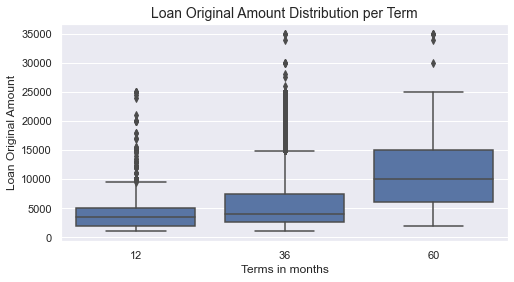

In [41]:
# Generating the boxplot
fg(8, 4)
sb.boxplot(data=df, x='Term', y='LoanOriginalAmount', color = base_color)
describe_graph(title = "Loan Original Amount Distribution per Term", x_label = "Terms in months", \
               y_label = "Loan Original Amount");

Statistically, the graph shows expected trends. Long term loans are in general more expensive (since there is more time to complete the payment). We see that the median of the loan amount for a 60-months loan is much higher that the ones for 12 and 36 months.

## Multivariate Exploration

We already had a look at the relationship between the loan amount and the loan status. To go even further, we could try to see how these variables might change based on the fact of owning a home, or the employment status. 

### Do combined features like owning a home and the loan original amount impact the loan status?

We need a three dimensional plot to investigate this. With one numeric and two categorical variables, violinplots make perfect sense. Also because violinplots add kernel density plot to the summary statistics. 

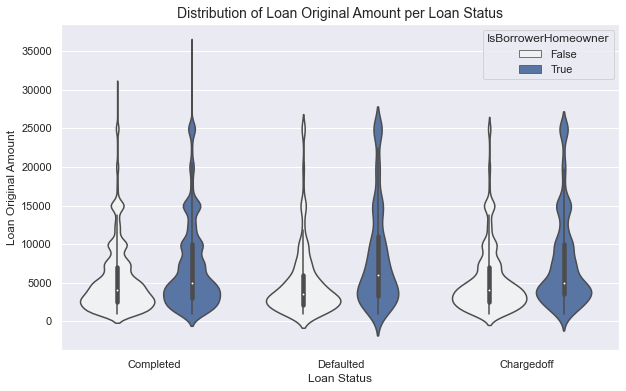

In [42]:
# Generating boxplots
fg(10, 6)
sb.violinplot(data=df, x='LoanStatus', y='LoanOriginalAmount', color = base_color, hue = "IsBorrowerHomeowner")
describe_graph(title = "Distribution of Loan Original Amount per Loan Status", \
               x_label = "Loan Status", y_label = "Loan Original Amount");

Regardless of the loan status, <b>home owners tend to acquire more expensive loans</b>. Indeed, the median and 3rd quartile of loan amounts are higher for home owners. On the other hand, owning a home doesn't seem to have a significant impact on the loan status. The main fact we can mention is the long trail for completed loans (showing very high value for loan amounts). 

### Do combined features like employment status and the loan original amount impact the loan status?

This investigation is among the most interesting ones. We know from experience that the employment status plays a role if someone wants to first obtain a loan. We have already explored each of these variables alone. Let's see how they interact. The variables types make the use of boxplot appropriate.

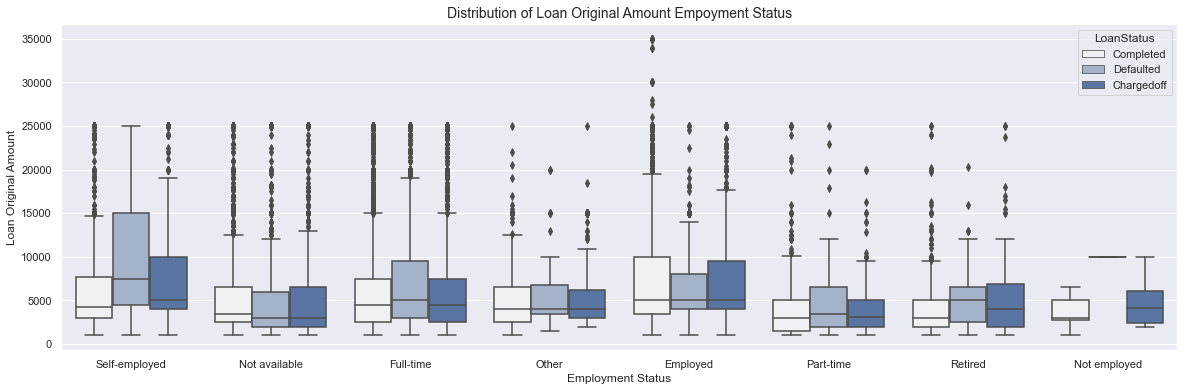

In [43]:
# Generating the plots
fg(20, 6)
sb.boxplot(data=df, x='EmploymentStatus', y='LoanOriginalAmount', color = base_color, hue = "LoanStatus")
describe_graph(title = "Distribution of Loan Original Amount Empoyment Status", \
               x_label = "Employment Status", y_label = "Loan Original Amount");

What are some key findings:
- <b>Self-employed</b> people with <b>completed loans</b> have a much lower median loan amount than self-employed with defaulted loans.
- The highest Interquartile Range is definitely for <b>self-employed</b> with <b>defaulted loans</b>. This means that most of the loans for the subset of the data are very spread. 

## Conclusions

- The only correlation that needs our attention is the one between `ProsperScore` and `BorrowerRate`. There is a relatively strong and negative correlation (r = -0.717) between these two variables. That means, when the ProsperScore increases, the Borrower Rate tend to decrease. This is understandable. A higher prosper score means a loan with less risk. The lower the interest rate (low `BorrowerRate`), the lower the risk (high `ProsperScore`) to pay back. 

- The 1st, 2rd, 3rd quartile, and the maximum value for the borrower rate of <b>Completed</b> loans are all <b>lower</b> that the ones of defaulted and chargedoff loans. In general, people with lower interest rate for their loan tend to complete the payment.  

- Long term loans are in general more expensive (since there is more time to complete the payment). We see that the median of the loan amount for a 60-months loan is much higher that the ones for 12 and 36 months.

- Regardless of the loan status, <b>home owners tend to acquire more expensive loans</b>. Indeed, the median and 3rd quartile of loan amounts are higher for home owners. On the other hand, owning a home doesn't seem to have a significant impact on the loan status. 

- <b>Self-employed</b> people with <b>completed loans</b> have a much lower median loan amount than self-employed with defaulted loans.